Source of Data Set: "https://www.kaggle.com/nehasontakke/amazon-unlocked-mobilecsv"


In [ ]:
import pandas as pd
import numpy as np
import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv("/content/Amazon_Unlocked_Mobile.csv")
df.shape

(413840, 6)

In [67]:
df.columns

Index(['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews',
       'Review Votes'],
      dtype='object')

In [68]:
df.dtypes

Product Name     object
Brand Name       object
Price           float64
Rating            int64
Reviews          object
Review Votes    float64
dtype: object

In [71]:
df.describe()


,Price,Rating,Review Votes
count,407907.000000,413840.000000,401544.000000
mean,226.867155,3.819578,1.507237
std,273.006259,1.548216,9.163853
min,1.730000,1.000000,0.000000
25%,79.990000,3.000000,0.000000
50%,144.710000,5.000000,0.000000
75%,269.990000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


In [73]:
df.head(5)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


<p> data cleaning and select rating </p>

In [74]:
df.replace("?",np.nan,inplace=True)

In [75]:
df.isnull().sum()

Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            62
Review Votes    12296
dtype: int64

Data Warangling 

In [78]:
df.dropna(inplace=True)
df.reset_index (drop=True,inplace=True)

In [103]:
df[df['Rating'] != 3]
df['Positively Rated'] = np.where(df['Rating'] > 3, 1, 0)
df.head(5)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Positively Rated
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,1
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,1
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,1
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,1


In [81]:
df.corr()

,Price,Rating,Review Votes,Positively Rated
Price,1.000000,0.073948,0.022164,0.073898
Rating,0.073948,1.000000,-0.046526,0.925830
Review Votes,0.022164,-0.046526,1.000000,-0.039775
Positively Rated,0.073898,0.925830,-0.039775,1.000000


Create train/test dataset with high corelation variables

In [82]:
cdf = df[['Review Votes','Positively Rated']]
cdf.rename(columns={'Review Votes':'Votes','Positively Rated': 'Rated' },inplace=True)

In [83]:
cdf.head(5)

,Votes,Rated
0,1.0,1
1,0.0,1
2,0.0,1
3,0.0,1
4,0.0,1


Exploration data

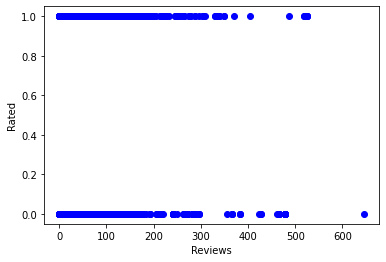

In [84]:
plt.scatter (cdf.Votes,cdf.Rated,color='blue')
plt.xlabel ("Reviews")
plt.ylabel ("Rated")
plt.show()

Relationship between 'Review Votes','Positively Rated' are not linern. So we should be use Logistic regression.

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], df['Positively Rated'], random_state = 0)

In [110]:
print('X_train Elemenet Example:', "\"",X_train[0],"\"")
print('X_train shape: ', X_train.shape)

X_train Elemenet Example: " I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!! "
X_train shape:  (250751,)


Create token for each word and eliminate stop word

In [87]:

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer().fit(X_train)

In [88]:
vect.get_feature_names()[::3000]

['00',
 '858',
 'approval',
 'booth',
 'cmon',
 'dealsthanks',
 'eclair',
 'ff',
 'gsmpros',
 'insertion',
 'linkhttps',
 'movment',
 'outmatches',
 'preserving',
 'reinstall',
 'separating',
 'stilllllll',
 'todo',
 'veryclear']

In [89]:
len(vect.get_feature_names())

56948

In [90]:
X_train_vectorized = vect.transform(X_train)
X_train_vectorized


<250751x56948 sparse matrix of type '<class 'numpy.int64'>'
	with 6848862 stored elements in Compressed Sparse Row format>

Prodiction with Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

LogisticRegression()

In [92]:
from sklearn.metrics import roc_auc_score

predictions = model.predict(vect.transform(X_test))

auc_Cnt_Vct =  roc_auc_score(y_test, predictions)
print('AUC: ',auc_Cnt_Vct )

AUC:  0.8851011035970919


In [93]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs: \n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}\n'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs: 
['worst' 'junk' 'disappointing' 'garbage' 'upset' 'false' 'dirty'
 'unusable' 'crashes' 'freezes']

Largest Coefs: 
['excelent' 'excelente' 'exelente' 'loving' 'perfecto' 'loves' 'excellent'
 'complaints' 'superb' 'worried']



We just change wroding weght algorithm from CountVectorier to TF-IDF

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df = 5).fit(X_train)           # replace with 5 times
len(vect.get_feature_names())

18952

In [95]:
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
print('AUC from TF-IDF: ', roc_auc_score(y_test, predictions))
print ('AUC from CountVectorizer:', auc_Cnt_Vct )

AUC from TF-IDF:  0.9001834688542185
AUC from CountVectorizer: 0.8851011035970919


AUC from both algorithms are very closly

In [96]:
feature_names = np.array(vect.get_feature_names())

sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

print('Smallest Tfidf: \n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest Tfidf: \n{}\n'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest Tfidf: 
['seizing' 'srgb' 'excites' '1b' '625nits' 'brawns' '700nits' '16nm'
 'liquidating' 'reading___']

Largest Tfidf: 
['unacceptable' 'hi' 'gud' 'gucci' 'love' 'loved' 'unusable' 'case'
 'seller' '5stars']



In [97]:
sorted_coef_index = model.coef_[0].argsort()

print('Smallest coef: \n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest coef: \n{}\n'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest coef: 
['not' 'worst' 'disappointed' 'waste' 'poor' 'terrible' 'return' 'stopped'
 'slow' 'horrible']

Largest coef: 
['love' 'great' 'amazing' 'excellent' 'perfect' 'loves' 'awesome' 'best'
 'perfectly' 'easy']



In [98]:
# These reviews are treated the same by our current model

print(model.predict(vect.transform(['Not an issue, phone is working', 
                                   'an issue, phone is not working'])))

[0 0]


In case use CountVectorizer with parameter "min_df=5" and ngram_range=(1,2) 

In [99]:
vect = CountVectorizer(min_df = 5, ngram_range = (1,2)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
len(vect.get_feature_names())

217388

In [100]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.937010592135122


In [101]:
feature_names = np.array(vect.get_feature_names())
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coef: \n{}\n'.format(feature_names[sorted_coef_index][:10]))
print('Largest Coef: \n{}\n'.format(feature_names[sorted_coef_index][:-11:-1]))

Smallest Coef: 
['junk' 'no good' 'not happy' 'worst' 'not satisfied' 'not worth'
 'garbage' 'wouldn recommend' 'disappointing' 'unusable']

Largest Coef: 
['excelent' 'excelente' 'exelente' 'perfecto' 'no issues' 'excellent'
 'loving' 'perfect' 'awsome' 'exelent']



In [102]:
print(model.predict(vect.transform(['not an issue, phone is working',
                                   'an issue, phone is not working'])))

[0 0]
